In [215]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score



In [216]:
Data = pd.read_csv('wine-quality-white-and-red.csv')
Data.head(10)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [217]:
#Now that we have imported the data we need to understand some things
#*1 what is our dataset saying to us 
#*2 what are the  problems of our data
#*3 what are the things not needed in my dataset
#*4 which algorithm should i use is it supervised or unsupervised
#*5 if supervised which algorithm is the best to solve my problem

Visualize you Dataset

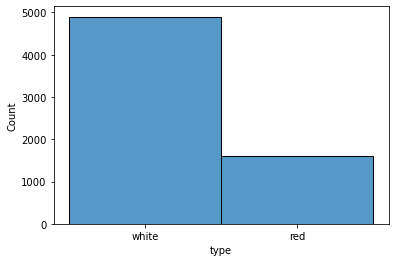

In [218]:
sns.histplot(Data['type'])

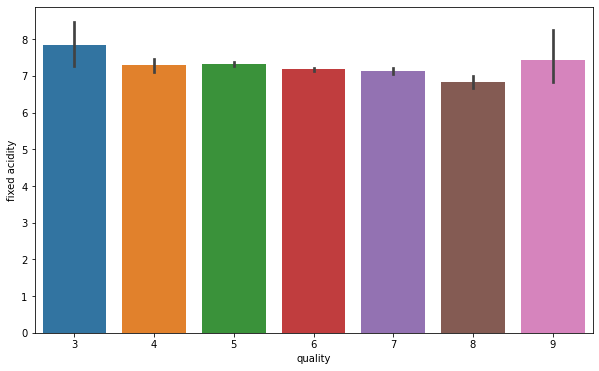

In [219]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = Data)

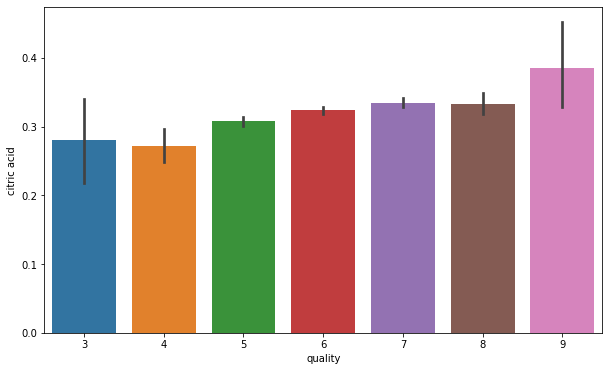

In [220]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = Data)


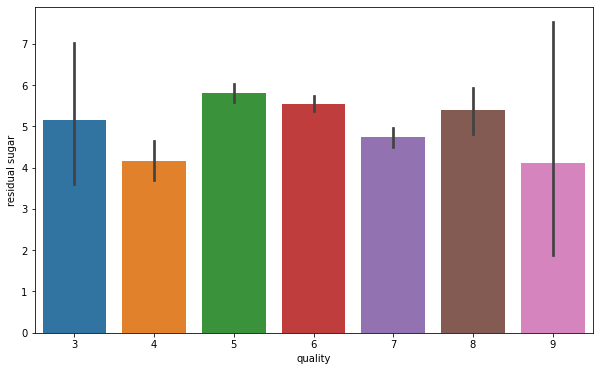

In [221]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar',data = Data)

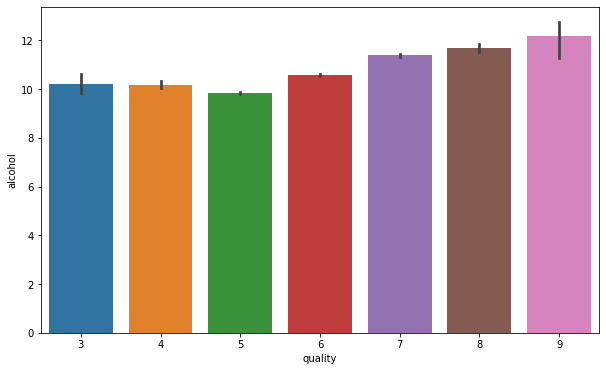

In [222]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = Data)

In [223]:
Data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [224]:
Data.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

In [225]:
Data.shape

(6497, 13)

In [226]:
Data.isnull().values.any()

False

In [227]:
def plot_corr(Data, size=11):
    

    corr = Data.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) 

In [228]:
Data.loc[Data['type'] == 'white','type' ] = 0
Data.loc[Data['type'] == 'red','type' ] = 1

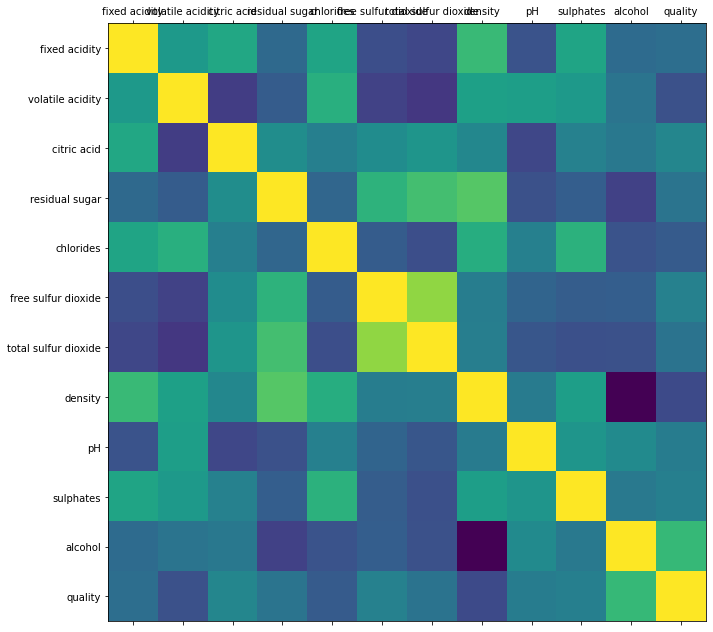

In [229]:
plot_corr(Data)

In [230]:
from sklearn.model_selection import train_test_split
feature_col_names = Data.columns
predicted_class_names = ['quality']

X =  Data[feature_col_names] 
X = X.astype('int')# predictor feature columns (8 X m)
y = Data[predicted_class_names] # predicted class (1=true, 0=false) column (1 X m)
y = y.astype('int')
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size,random_state=42) 


In [231]:
print("{0:0.2f}% in training set".format((len(X_train)/len(Data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(Data.index)) * 100))

69.99% in training set
30.01% in test set


In [232]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\1040 G3\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


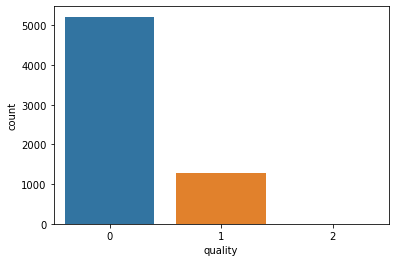

In [233]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)

Data['quality'] = pd.cut(Data['quality'], bins = bins,)

label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
Data['quality'] = label_quality.fit_transform(Data['quality'])
Data['quality'].value_counts()

sns.countplot(Data['quality'])

#Bad becomes 0 and good becomes 1 

In [234]:
from sklearn.svm import SVR
rf_model = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.5)
rf_model.fit(X_train, y_train.values.flatten())

SVR(C=100, epsilon=0.5, gamma=0.5)

### Predict Training Data

In [235]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_train, rf_predict_train)))

Accuracy: 0.9197


### Predict Test Data

In [236]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_test, rf_predict_test)))

Accuracy: 0.8662
